# Welcome to the Data Science Bowl Competition
This notebook is a starter code for all beginners and easy to understand.

We focus on
* a simple analysis of the data,
* create new features,
* encoding and 
* scale data.

We use categorical feature encoding techniques, compare

https://www.kaggle.com/drcapa/categorical-feature-encoding-challenge-xgb

In this kernel we consider the train data. For prediction we must repeate all operations also for the test data.

After that we define X_train and y_train.
The aim of the competition is to predict the target accuracy_group:

* 3: the assessment was solved on the first attempt
* 2: the assessment was solved on the second attempt
* 1: the assessment was solved after 3 or more attempts
* 0: the assessment was never solved

In [1]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
import os
import json

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [4]:
path_in = './input/data-science-bowl-2019/'
os.listdir(path_in)

['sample_submission.csv',
 'specs.csv',
 'test.csv',
 'train.csv',
 'train_labels.csv']

# Load Data
There is a column with a datetime information. So we can load as datetime type by parse_dates=['timestamp'].

In [5]:
train_data = pd.read_csv(path_in+'train.csv', parse_dates=['timestamp'])
train_labels = pd.read_csv(path_in+'train_labels.csv')
specs_data = pd.read_csv(path_in+'specs.csv')

# Help Function

In [6]:
def plot_bar(data, name, width, lenght):
    fig = plt.figure(figsize=(width, lenght))
    ax = fig.add_subplot(111)
    data_label = data[name].value_counts()
    dict_train = dict(zip(data_label.keys(), ((data_label.sort_index())).tolist()))
    names = list(dict_train.keys())
    values = list(dict_train.values())
    plt.bar(names, values)
    ax.set_xticklabels(names, rotation=45)
    plt.grid()
    plt.show()

# Analysis & Overview
First we do a simple analysis and show important kpis.

In [7]:
print('# samples train_data:', len(train_data))
print('# samples train_labels:', len(train_labels))
print('# samples specs:', len(specs_data))

# samples train_data: 11341042
# samples train_labels: 17690
# samples specs: 386


In [8]:
train_data.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [9]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [10]:
specs_data.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


# Missing data

Fortunately there are no missing data we have to deal.

In [11]:
cols_with_missing_train_data = [col for col in train_data.columns if train_data[col].isnull().any()]
cols_with_missing_train_labels = [col for col in train_labels.columns if train_labels[col].isnull().any()]
cols_with_missing_specs_data = [col for col in specs_data.columns if specs_data[col].isnull().any()]

In [12]:
print(cols_with_missing_train_data)
print(cols_with_missing_train_labels)
print(cols_with_missing_specs_data)

[]
[]
[]


# Feature engineering
There are 3 keys:

1) game_session, installation_id: to merge train data and train labels

2) event_id: to merge train data and specs 

For the idea of the feature engineering we reduce the train data and use a subset. 

In [12]:
#train_data = train_data.loc[0: len(train_data.index)/233]

## Train data

In [13]:
train_data.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [14]:
train_data.dtypes

event_id                        object
game_session                    object
timestamp          datetime64[ns, UTC]
event_data                      object
installation_id                 object
event_count                      int64
event_code                       int64
game_time                        int64
title                           object
type                            object
world                           object
dtype: object

### Feature event_id
Randomly generated unique identifier for the event type.

There are dublictated codes.

In [15]:
train_data['event_id'].value_counts()

1325467d    274673
bb3e370b    256179
cf82af56    224694
5e812b27    206129
cfbd47c8    199734
             ...  
17ca3959         1
dcb1663e         1
a8cc6fec         1
003cd2ee         1
5dc079d8         1
Name: event_id, Length: 384, dtype: int64

### Feature game_session
Randomly generated unique identifier grouping events within a single game or video play session.

There are dublictated codes.

In [16]:
train_data['game_session'].value_counts()

6e6e697f2e593de1    3368
bb1f09ec062b6660    3182
33495c8f126e2ef9    2505
34c82b23355e378c    2456
8fe0ab3c3e448a04    2398
                    ... 
b101bb7426c5fc9f       1
08835d1603a15dda       1
d7ee5e92eb99d5c4       1
e47e294d56b6f67d       1
991336f8644899d2       1
Name: game_session, Length: 303319, dtype: int64

### Feature timestamp
Is the client-generated datetime. You can extract new features like month, day or hour. These are cyclic features which can be encoded. Additionally we create the feature weekend: 5 = saturday and 6 = sunday.

In [17]:
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.weekday
train_data['hour'] = train_data['timestamp'].dt.hour
train_data['weekend'] = np.where((train_data['day'] == 5) | (train_data['day'] == 6), 1, 0)

In [18]:
features_cyc = {'month' : 12, 'day' : 7, 'hour' : 24}
for feature in features_cyc.keys():
    train_data[feature+'_sin'] = np.sin((2*np.pi*train_data[feature])/features_cyc[feature])
    train_data[feature+'_cos'] = np.cos((2*np.pi*train_data[feature])/features_cyc[feature])
train_data = train_data.drop(features_cyc.keys(), axis=1)

### Feature event_data
Semi-structured JSON formatted string containing the events parameters. Default fields are: event_count, event_code, and game_time; otherwise fields are determined by the event type.

Next we show how to encode the features of a dictionary. 
Without loss of generality we consider only the feature *description*.
If you don't want to extract new features you can delete the column.

In [19]:
encode_fields = ['description']
# steps = 233
# for i in range(steps):
#     print('work on step: ', i+1)
#     for encode_field in encode_fields:
#         slice_from = i*len(train_data.index)/steps
#         slice_to = (i+1)*len(train_data.index)/steps-1
#         train_data.loc[slice_from:slice_to, encode_field] = train_data.loc[slice_from:slice_to, 'event_data'].apply(json.loads).apply(pd.Series)[encode_field]
del train_data['event_data']

### Feature installation_id
The installation_id will typically correspond to one child.
It is dandomly generated unique identifier grouping game sessions within a single installed application instance.

### Feature event_count
 Incremental counter of events within a game session (offset at 1). Extracted from event_data.

### Feature event_code
Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g. event code '2000' always identifies the 'Start Game' event for all games. Extracted from event_data.

### Feature game_time
Time in milliseconds since the start of the game session. Extracted from event_data.

### Feature title
Title of the game or video. The feature title is a categorical feature with lot of categories. For the first we use a simple mapping.

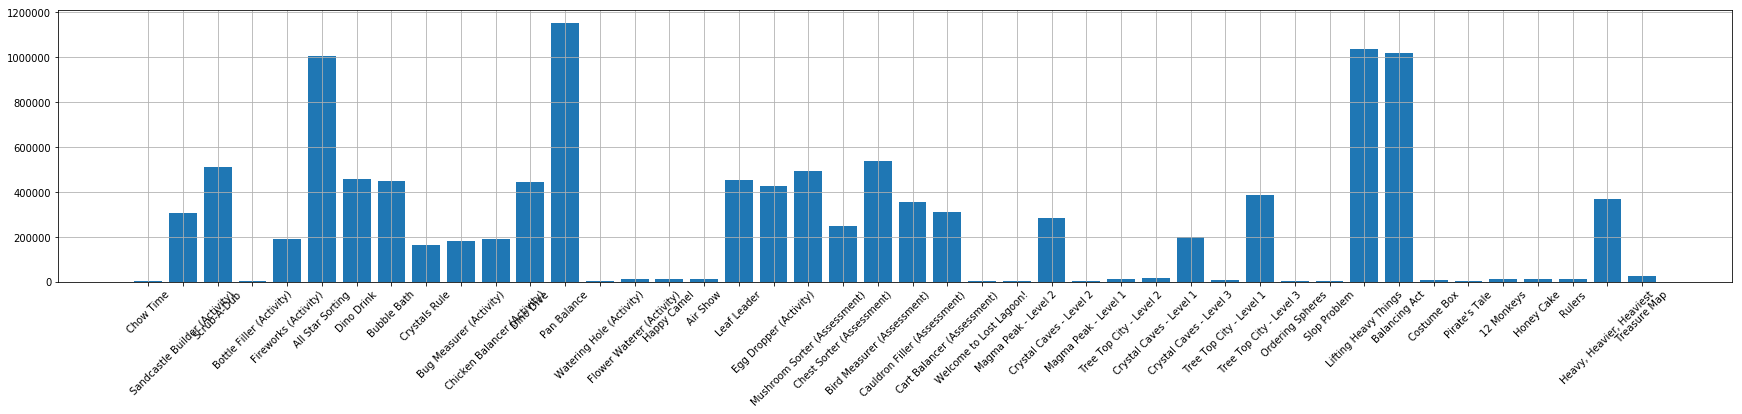

In [20]:
plot_bar(train_data, 'title', 30, 5)

In [21]:
map_train_title = dict(zip(train_data['title'].value_counts().sort_index().keys(),
                     range(1, len(train_data['title'].value_counts())+1)))

In [22]:
train_data['title'] = train_data['title'].replace(map_train_title)

### Feature type
Media type of the game or video. Possible values are: 'Game', 'Assessment', 'Activity', 'Clip'. This is a categorical feature which we encode by one hot encoding technique.

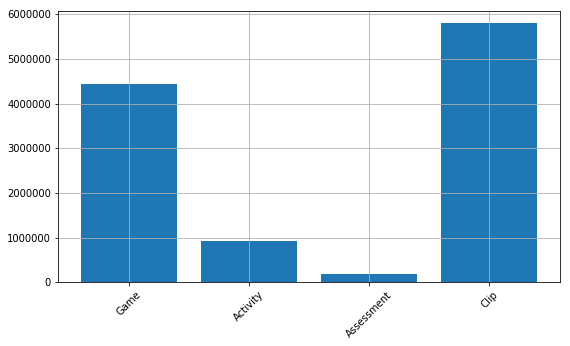

In [23]:
plot_bar(train_data, 'type', 9, 5)

In [24]:
train_data = pd.get_dummies(train_data, columns=['type'])

### Feature world
The section of the application the game or video belongs to. Helpful to identify the educational curriculum goals of the media. Possible values are: 'NONE' (at the app's start screen), TREETOPCITY' (Length/Height), 'MAGMAPEAK' (Capacity/Displacement), 'CRYSTALCAVES' (Weight). This is a categorical feature which we encode by one hot encoding technique.

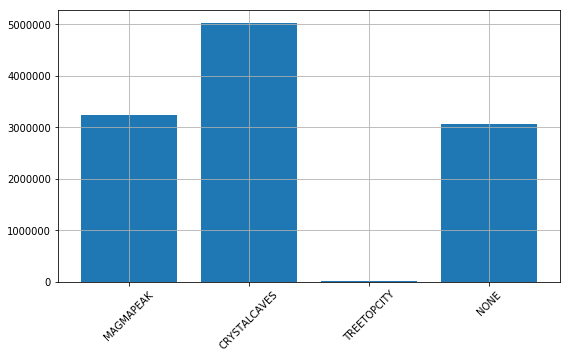

In [25]:
plot_bar(train_data, 'world', 9, 5)

In [26]:
train_data = pd.get_dummies(train_data, columns=['world'])

## Train labels
This dataset demonstrates how to compute the ground truth for the assessments in the training set.

In [27]:
train_labels.columns

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

### Feature game_session
 Randomly generated unique identifier grouping events within a single game or video play session.

### Feature installation_id
Randomly generated unique identifier grouping game sessions within a single installed application instance.

### Feature title
The feature title is a categorical feature. For the first we use a simple mapping.

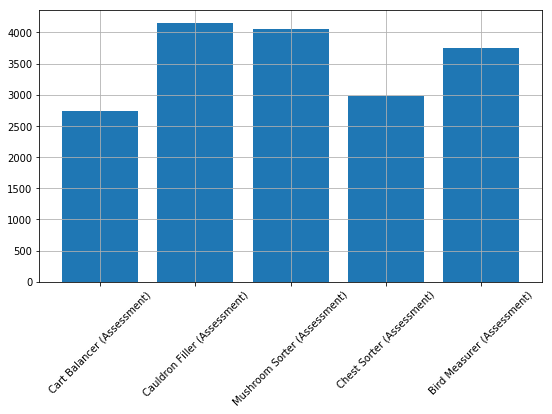

In [28]:
plot_bar(train_labels, 'title', 9, 5)

In [29]:
map_label_title = dict(zip(train_labels['title'].value_counts().sort_index().keys(),
                     range(1, len(train_labels['title'].value_counts())+1)))

In [30]:
train_labels['title'] = train_labels['title'].replace(map_label_title)

### Feature num_correct
This is a binary feature we can use without modification. 

In [31]:
train_labels['num_correct'].value_counts()

1    13461
0     4229
Name: num_correct, dtype: int64

### Feature num_incorrect
This is a numerical feature.

In [32]:
#train_labels['num_incorrect'].value_counts()

### Feature accuracy
This is a float fearure.

In [33]:
train_labels['accuracy'].describe()

count    17690.000000
mean         0.595810
std          0.430559
min          0.000000
25%          0.111111
50%          0.750000
75%          1.000000
max          1.000000
Name: accuracy, dtype: float64

### Feature accuracy_group
This is the target we have to predict.

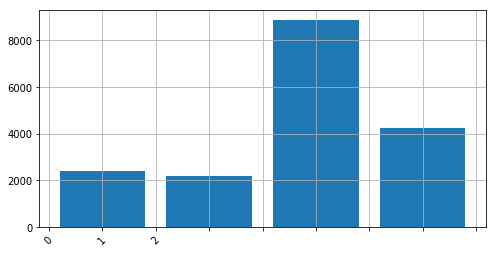

In [34]:
plot_bar(train_labels, 'accuracy_group', 8, 4)

In [35]:
train_labels['accuracy_group'].value_counts().sort_index()

0    4229
1    2411
2    2205
3    8845
Name: accuracy_group, dtype: int64

## Specs
This file gives the specification of the various event types.

In [36]:
specs_data.columns

Index(['event_id', 'info', 'args'], dtype='object')

### Feature event_id
Global unique identifier for the event type.

In [37]:
specs_data['event_id']

0      2b9272f4
1      df4fe8b6
2      3babcb9b
3      7f0836bf
4      ab3136ba
         ...   
381    29f54413
382    06372577
383    2a444e03
384    9e6b7fb5
385    d3640339
Name: event_id, Length: 386, dtype: object

### Feature info
Description of the event. There are 168 different types of informations.

In [38]:
specs_data['info'].value_counts()

This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.                                                                                                                                                                                      17
This event occurs when the player hovers the mouse over an interactive object. It contains information about the object under the mouse, and the duration of the hover. This event can be used to diagnose things like planning (are they hovering the mouse over tiles for long periods before they use those tiles), and determine which objects the player thinks are important.                                                                                                     16
The start game event is triggered at the very begi

### Feature args
JSON formatted string of event arguments. Each argument contains:
* name - Argument name.
* type - Type of the argument (string, int, number, object, array).
* info - Description of the argument.

So what can we do with the information?

In [39]:
specs_data.loc[0, 'args']

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

# Merge data
For the first step we only merge the train_data with the train_label by the key . 

In [40]:
train_data = pd.merge(train_data, train_labels,  how='right', on=['game_session','installation_id'])

In [41]:
train_data

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title_x,weekend,month_sin,...,type_Game,world_CRYSTALCAVES,world_MAGMAPEAK,world_NONE,world_TREETOPCITY,title_y,num_correct,num_incorrect,accuracy,accuracy_group
0,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,0006a69f,1,2000,0,31,0,-0.866025,...,0,0,0,0,1,5,1,0,1.000000,3
1,db02c830,901acc108f55a5a1,2019-08-06 05:22:01.400000+00:00,0006a69f,2,2025,37,31,0,-0.866025,...,0,0,0,0,1,5,1,0,1.000000,3
2,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:01.403000+00:00,0006a69f,3,3010,37,31,0,-0.866025,...,0,0,0,0,1,5,1,0,1.000000,3
3,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:05.242000+00:00,0006a69f,4,3110,3901,31,0,-0.866025,...,0,0,0,0,1,5,1,0,1.000000,3
4,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:05.244000+00:00,0006a69f,5,3010,3901,31,0,-0.866025,...,0,0,0,0,1,5,1,0,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865442,28520915,5448d652309a6324,2019-09-22 02:07:27.562000+00:00,ffeb0b1b,58,2030,67094,10,1,-1.000000,...,0,0,1,0,0,3,1,2,0.333333,1
865443,91561152,5448d652309a6324,2019-09-22 02:07:27.562000+00:00,ffeb0b1b,57,4025,67094,10,1,-1.000000,...,0,0,1,0,0,3,1,2,0.333333,1
865444,d3268efa,5448d652309a6324,2019-09-22 02:07:27.566000+00:00,ffeb0b1b,59,3021,67094,10,1,-1.000000,...,0,0,1,0,0,3,1,2,0.333333,1
865445,b5053438,5448d652309a6324,2019-09-22 02:07:28.311000+00:00,ffeb0b1b,60,3121,67847,10,1,-1.000000,...,0,0,1,0,0,3,1,2,0.333333,1


# Define X_train and y_train
The featrue accuracy_group is the target which is to predict.

In [42]:
no_features = ['accuracy_group', 'event_id', 'game_session', 'timestamp','installation_id']
X_train = train_data[train_data.columns.difference(no_features)].copy(deep=False)
y_train = train_data['accuracy_group']

In [43]:
len(X_train.index), len(train_data.index)

(865447, 865447)